# 感知机

相当于一个只有一个神经元的神经网络

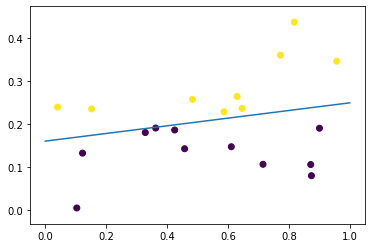

In [120]:
import numpy as np
import matplotlib.pyplot as plt

w = np.random.rand(2, 1)
x = np.random.rand(20, 1)
x = np.c_[x, np.ones_like(x)]
y = x.dot(w) + np.random.randn(20, 1)/10

# 生成随机可线性二分的两组点
colors = np.sign(y-x.dot(w))
plt.scatter(x[:, 0], y, c=colors)

x0 = np.linspace(0, 1, 10)
x0 = np.c_[x0, np.ones_like(x0)]
y0 = x0.dot(w)
plt.plot(x0[:, 0], y0)

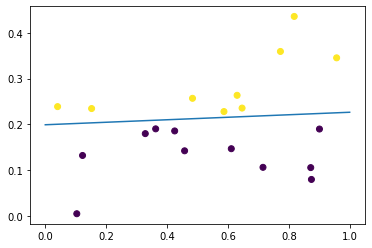

In [121]:
X = np.c_[x[:, 0], y, np.ones_like(y)]
Y = colors
W = np.random.rand(3, 1)
# 计算感知机的参数
for epcho in range(1000):
    i = np.random.choice(len(X))
    x0 = X[i].reshape(1, -1)
    y0 = np.asscalar(Y[i])
#     if y0 > 0 and np.asscalar(x0.dot(W)) < 0:
#         W += x0.T
#     elif y0 < 0 and np.asscalar(x0.dot(W)) >= 0:
#         W -= x0.T
    if y0 * np.asscalar(x0.dot(W)) < 0:
        W += y0 * x0.T
        
x0 = np.linspace(0, 1, 10)
y0 = [(-W[2]-W[0]*v)/W[1] for v in x0]
plt.plot(x0, y0)

plt.scatter(X[:, 0], X[:,1], c=np.sign(X.dot(W)).flatten())


**平均感知器算法**

如果训练数据是线性可分的，那么感知器可以找到一个判别 函数来分割不同类的数据。如果间隔 γ 越大，收敛越快。但是感知器并不能保证 找到的判别函数是最优的(比如泛化能力高)，这样可能导致过拟合。

感知器的学习到的权重向量和训练样本的顺序相关。在迭代次序上排在后 面的错误样本，比前面的错误样本对最终的权重向量影响更大。比如有 1, 000 个 训练样本，在迭代 100 个样本后，感知器已经学习到一个很好的权重向量。在接 下来的 899 个样本上都预测正确，也没有更新权重向量。但是在最后第 1, 000 个 样本时预测错误，并更新了权重。这次更新可能反而使得权重向量变差。

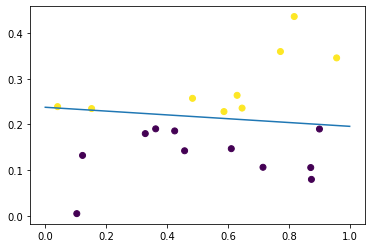

In [122]:
W = np.random.rand(3, 1)
U = np.random.rand(3, 1)
# 计算感知机的参数
c = 1
for epcho in range(1000):
    i = np.random.choice(len(X))
    x0 = X[i].reshape(1, -1)
    y0 = np.asscalar(Y[i])
#     if y0 > 0 and np.asscalar(x0.dot(W)) < 0:
#         W += x0.T
#     elif y0 < 0 and np.asscalar(x0.dot(W)) >= 0:
#         W -= x0.T
    if y0 * np.asscalar(x0.dot(W)) < 0:
        W += y0 * x0.T
        U += c * y0 * x0.T
    c += 1
W -= 1.0/c * U        
x0 = np.linspace(0, 1, 10)
y0 = [(-W[2]-W[0]*v)/W[1] for v in x0]
plt.plot(x0, y0)

plt.scatter(X[:, 0], X[:,1], c=np.sign(X.dot(W)).flatten())

使用核函数

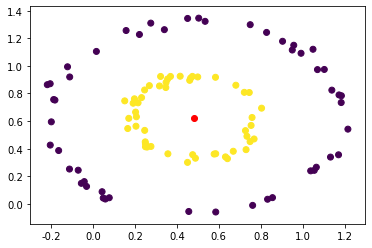

In [106]:
# 生成随机二分类点
import math
center = np.random.rand(2)
# math.sqrt(2)
size = 50
d = np.random.randn(size) / 50
points = []
for r0 in [0.3, 0.7]:
    for i in range(size):
        r = r0 + d[i]
        theta = np.random.rand() * 2 * np.pi
        x = center[0] + r * np.cos(theta)
        y = center[1] + r * np.sin(theta)
        points.append([x, y])

points = np.array(points)
colors = [1] * size + [0] * size
plt.scatter(points[:, 0], points[:, 1], c=colors)

plt.scatter([center[0]], center[1], c='r')

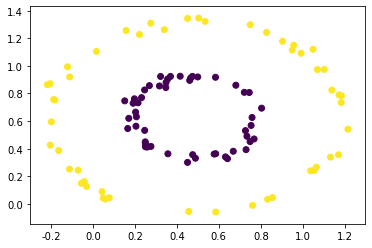

In [112]:
X = np.c_[points, np.ones(len(points))]
X = np.concatenate([X, X**2], axis=1)
y = np.array([-1] * size + [1] * size).reshape(-1, 1)

W = np.random.rand(X.shape[1], 1)


for epcho in range(1000):
    i = np.random.choice(len(X))
    x0 = X[i].reshape(1, -1)
    y0 = np.asscalar(y[i])
    if y0 * np.asscalar(x0.dot(W)) < 0:
        W += y0 * x0.T

pred = np.sign(X.dot(W))

plt.scatter(points[:, 0], points[:, 1], c=pred.flatten())

多分类问题

In [185]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
N = 100
X, y = make_classification(n_samples=N, n_features=5, n_informative=3, n_classes=3)
encoder = OneHotEncoder(categories='auto', sparse=False)
encoder.fit_transform(y0.reshape(-1, 1))

W = np.random.rand(5, 3)
W2 = W.copy()
for epoch in range(1000):
    X, y = shuffle(X, y)
    for i in range(N):
        xi, yi = X[i].reshape(-1, 1), y[i]
        yhat = np.argmax(W.T.dot(xi).flatten())
        if yhat != yi:
            ya, yb = [encoder.transform(np.array([v]).reshape(-1, 1)) for v in [yi, yhat]]
            W2[:, yi] = W2[:, yi] + xi.flatten()
            W2[:, yhat] = W2[:, yhat] - xi.flatten()
            W = W + xi.dot(ya-yb) # W += xi.dot(ya-yb) will not work

pred = X.dot(W)
pred2 = X.dot(W2)

print(accuracy_score(encoder.inverse_transform(pred), y))
print(accuracy_score(encoder.inverse_transform(pred2), y))

0.87
0.87


In [175]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X, y)

print(accuracy_score(model.predict(X), y))


1.0
